In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from Vector2D import Vector2D
from scipy.interpolate import CubicSpline

In [2]:
# cam = cv2.VideoCapture(1)
# result, image = cam.read()
# plt.imshow(image)
# cam.release()

In [3]:
# cv2.imwrite('prueba.png', image)

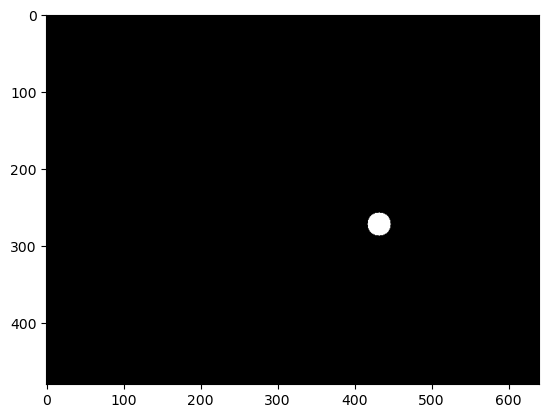

In [4]:
img = np.zeros((480, 640, 3), dtype='uint8')
circle_radius = 15
circle_center_x = np.random.randint(200+circle_radius, 640 - 100 - circle_radius)
circle_center_y = np.random.randint(100+circle_radius, 480 - 100 - circle_radius)
cv2.circle(img, (circle_center_x, circle_center_y), circle_radius, (255, 255, 255), -1)
plt.imshow(img)

In [5]:
image = cv2.imread('prueba1.png')

(480, 640, 3)


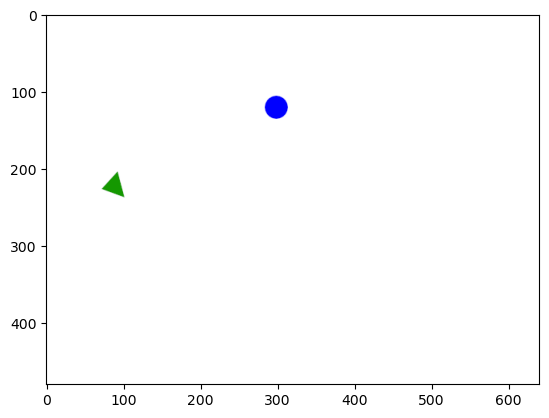

In [6]:
print(image.shape)
plt.imshow(image)

https://www.geeksforgeeks.org/how-to-detect-shapes-in-images-in-python-using-opencv/

https://pyimagesearch.com/2016/02/08/opencv-shape-detection/

In [7]:
img = image

In [8]:
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

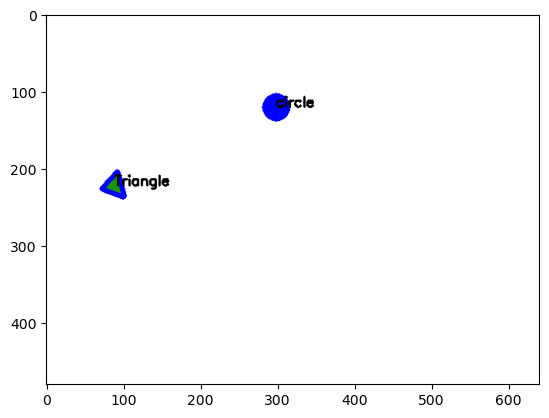

In [9]:
i = 0

shapes = []
  
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.04 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])

        shape = {'center': Vector2D(x, y)}
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

        shape['shape'] = 'triangle'
  
    # elif len(approx) == 4:
    #     cv2.putText(img, 'Quadrilateral', (x, y),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
  
    # elif len(approx) == 5:
    #     cv2.putText(img, 'Pentagon', (x, y),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
  
    # elif len(approx) == 6:
    #     cv2.putText(img, 'Hexagon', (x, y),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
  
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

        shape['shape'] = 'circle'
    
    shapes.append(shape)

plt.imshow(img)

In [10]:
for shape in shapes:
   print(f'Shape: {shape["shape"]}')
   print(shape['center']) 
   if shape['shape'] == 'triangle':
      car_center = shape['center']
   if shape['shape'] == 'circle':
      ball_center = shape['center']

Shape: triangle
x, y = 88, 222
Shape: circle
x, y = 298, 120


In [11]:
goal_center = Vector2D(640, 480/2)

In [12]:
def get_line_function(Vec1,Vec2):
    x1 = Vec1.x
    x2 = Vec2.x
    y1 = Vec1.y
    y2 = Vec2.y

    m = (y2-y1)/(x2-x1)
    b = y1 - m*x1

    return lambda x: m*x + b

ball_goal_func = get_line_function(ball_center, goal_center)

In [13]:
def draw_trajectory(img, traj_func, from_, to_, color, thicnkess):
    traj_img = img.copy()
    traj_x = np.arange(from_.x, to_.x, 1)
    for i in range(len(traj_x) - 1):
        from_x = traj_x[i]
        to_x = traj_x[i+1]
        from_y = int(traj_func(from_x))
        to_y = int(traj_func(to_x))
        from_coord = (from_x, from_y)
        to_coord = (to_x, to_y)
        traj_img = cv2.line(traj_img, from_coord, to_coord, color, thicnkess)

    return traj_img

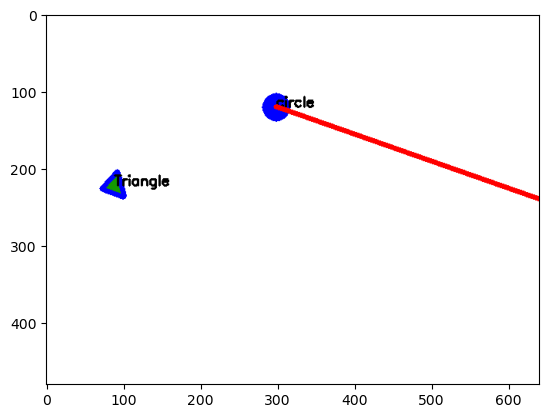

In [14]:
ball_goal_img = draw_trajectory(img, ball_goal_func, ball_center, goal_center, (255, 0, 0), 5)
plt.imshow(ball_goal_img)

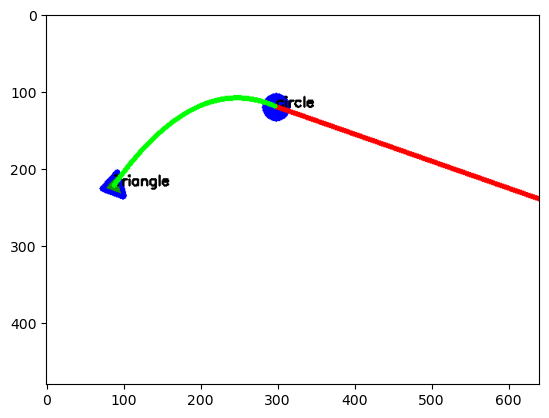

In [15]:
point3_x = ball_center.x - 10
point3_y = ball_goal_func(point3_x)
point3 = Vector2D(point3_x, point3_y)

spline_x = [car_center.x, point3.x, ball_center.x]
spline_y = [car_center.y, point3.y, ball_center.y]

spline = CubicSpline(spline_x, spline_y)

space = np.linspace(car_center.x, ball_center.x, 100)

car_traj_img = draw_trajectory(ball_goal_img, spline, car_center, ball_center, (0, 255, 0), 5)
plt.imshow(car_traj_img)